In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = pd.read_csv('/home/sargam/things/college/daa/lp3/ml/uber/uber.csv')

In [6]:
print("Dataset shape:", data.shape)
print(data.info())
print(data.head())



Dataset shape: (200000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    2589473

In [7]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], utc=True)

In [9]:
data.dropna(inplace=True)

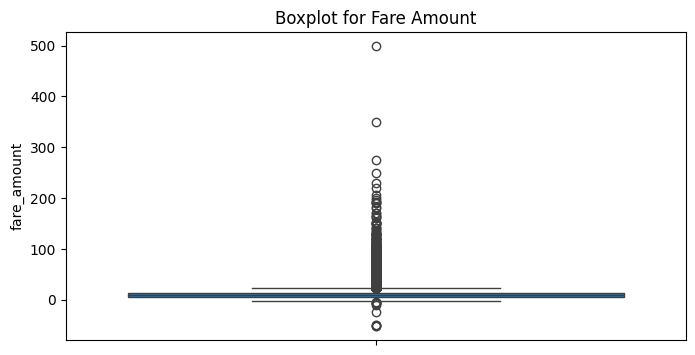

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(data['fare_amount'])
plt.title('Boxplot for Fare Amount')
plt.show()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution and boxplot of fare_amount to identify outliers
plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

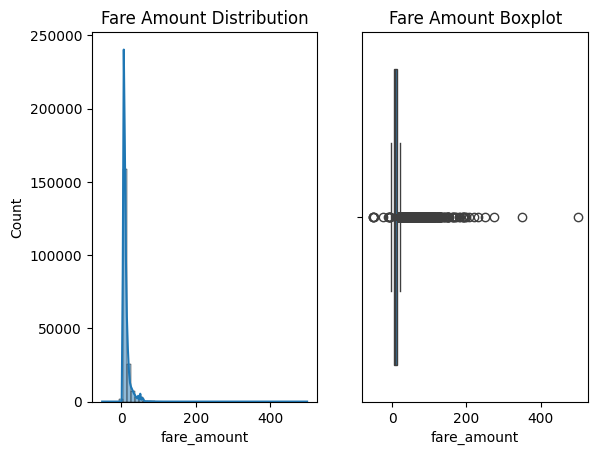

In [12]:
plt.subplot(1, 2, 1)
sns.histplot(data['fare_amount'], bins=50, kde=True)
plt.title('Fare Amount Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['fare_amount'])
plt.title('Fare Amount Boxplot')

plt.show()

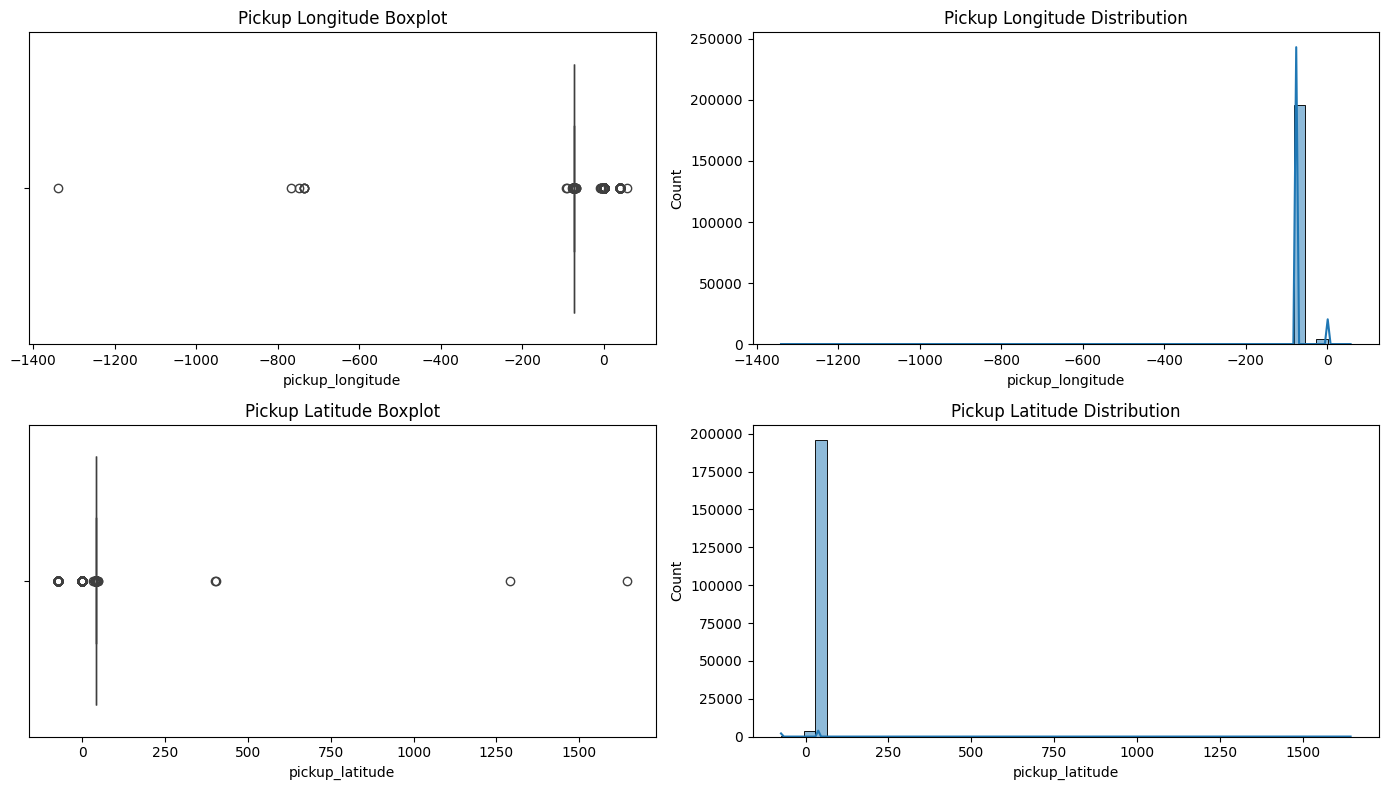

In [13]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=data['pickup_longitude'])
plt.title('Pickup Longitude Boxplot')

plt.subplot(2, 2, 2)
sns.histplot(data['pickup_longitude'], bins=50, kde=True)
plt.title('Pickup Longitude Distribution')

plt.subplot(2, 2, 3)
sns.boxplot(x=data['pickup_latitude'])
plt.title('Pickup Latitude Boxplot')

plt.subplot(2, 2, 4)
sns.histplot(data['pickup_latitude'], bins=50, kde=True)
plt.title('Pickup Latitude Distribution')

plt.tight_layout()
plt.show()

In [14]:
# Remove outliers outside 1st and 99th percentile
low_fare = data['fare_amount'].quantile(0.01)
high_fare = data['fare_amount'].quantile(0.99)
data = data[(data['fare_amount'] >= low_fare) & (data['fare_amount'] <= high_fare)]


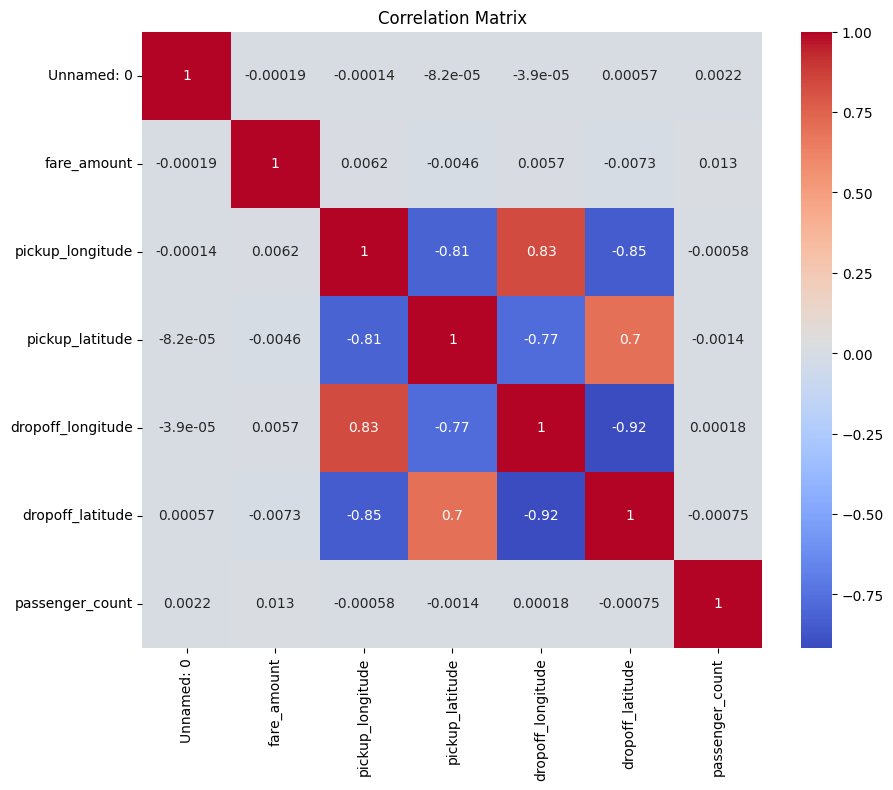

In [15]:
# Step 5: Correlation analysis
numeric_features = data.select_dtypes(include=[np.number])
corr = numeric_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [16]:
# Step 6: Feature Engineering
# Convert datetime to numerical features such as hour, day, weekday
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_weekday'] = data['pickup_datetime'].dt.weekday


In [17]:
# Step 7: Select Features and Target
# Drop columns that are not useful or contain identifiers
X = data.drop(columns=['fare_amount', 'pickup_datetime', 'key', 'Unnamed: 0'], errors='ignore')
y = data['fare_amount']


In [18]:
# Step 8: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Step 9: Implement Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [20]:
# Step 10: Implement Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [21]:
# Step 11: Evaluate models with RMSE and R2 Score
def evaluate_model(true, pred, model_name):
    rmse = np.sqrt(mean_squared_error(true, pred))
    r2 = r2_score(true, pred)
    print(f"{model_name} RMSE: {rmse:.4f}")
    print(f"{model_name} R2 Score: {r2:.4f}")


In [22]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")


Linear Regression RMSE: 8.0621
Linear Regression R2 Score: 0.0004
Random Forest Regression RMSE: 3.5102
Random Forest Regression R2 Score: 0.8105


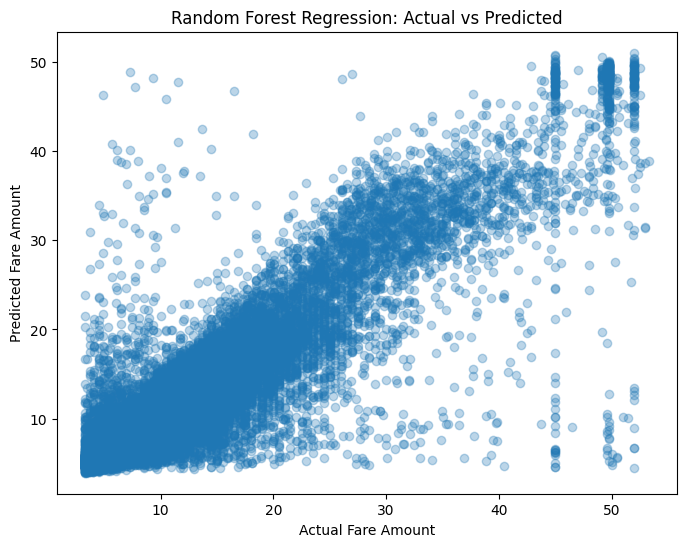

In [23]:
# Optional: Visualize actual vs predicted for the best model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()